In [53]:
import pandas as pd
import numpy as ny
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


In [54]:
df= pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


 Understand the relationship between product categories and their best-seller status.
 Create a crosstab between the product category and the isBestSeller status.

In [55]:
crosstab_result= pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


Are there categories where being a best-seller is more prevalent?

In [82]:
proportion = crosstab_result[True]/(crosstab_result[True]+crosstab_result[False])


In [86]:
proportion_sorted=proportion.sort_values(ascending= False)
proportion_sorted


category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Length: 296, dtype: float64

In [79]:
top_5_category=proportion_sorted.head(5)

In [100]:
top_5_category

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
dtype: float64

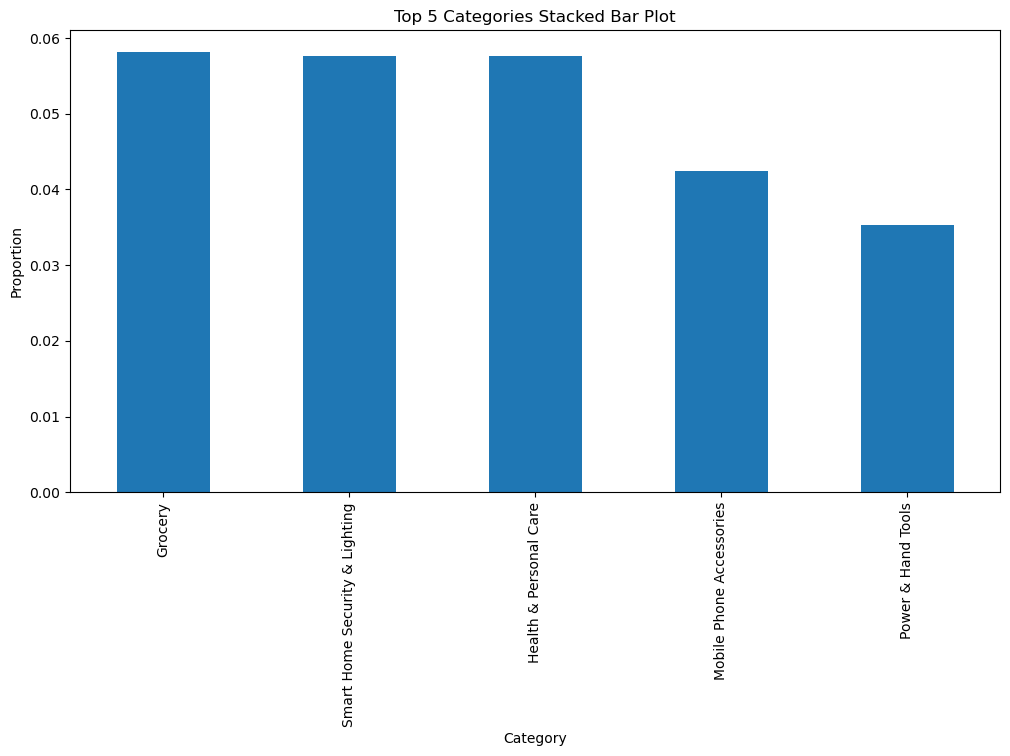

In [101]:
top_5_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Top 5 Categories Stacked Bar Plot')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [ ]:
chi2_statistic, chi2_p_value, df, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value,df

(36540.20270061387, 0.0, 295)

Insight- The null hypothesis of the Chi-square test is that the two categorical variables are independent. Given the extremely low ( p )-value(p<.05), we reject the null hypothesis. This implies that there's a significant association between bestseller and category in the dataset.

2. Compute Cramér's V to understand the strength of association between best-seller status and category.

In [ ]:
association(crosstab_result, method="cramer")

0.1222829439760564

Insight- Explanation when df = 295 and cramer V= .122 and it signifies weak association

In [ ]:
# crosstab_result1= pd.crosstab(df['isBestSeller'], df['category'])
# crosstab_result1

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


In [ ]:
# crosstab_result1.plot(kind='bar', stacked=True)

Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_9518/3845765387.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

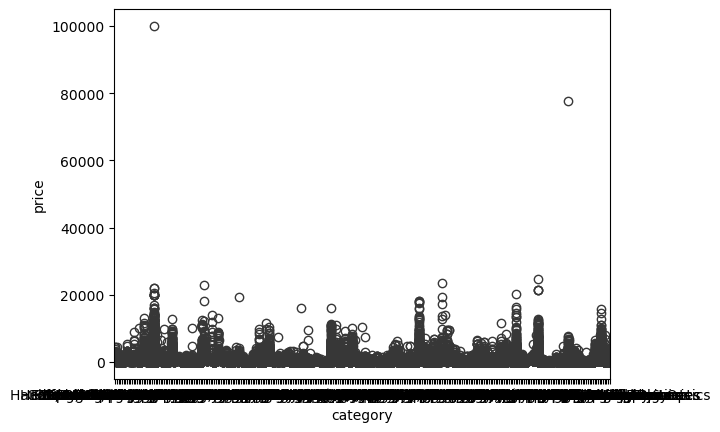

In [92]:
sns.boxplot(data=df, x='category', y='price', palette="coolwarm")

In [93]:
Q1  = df['price'].quantile(.25)
Q3  = df['price'].quantile(.75)
IQR = Q3- Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_filtered


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


<Axes: xlabel='category', ylabel='price'>

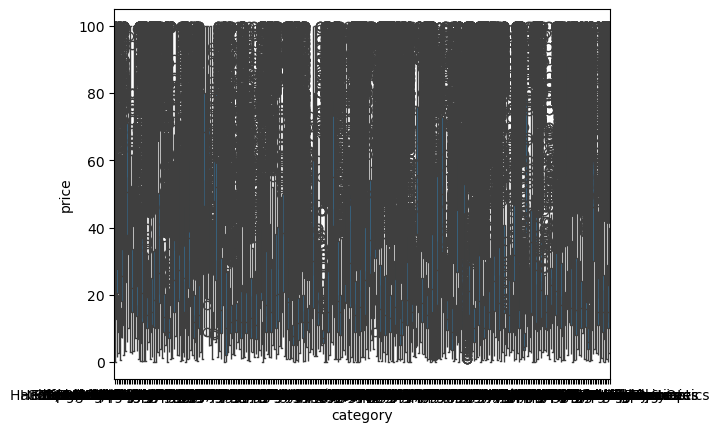

In [95]:
sns.boxplot(data=df_filtered, x='category', y='price')

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.


In [97]:
frequency_table=df["category"].value_counts(ascending=False)
top_20_frequency_table = frequency_table.head(20)
top_20_frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: count

/var/folders/f6/3j2ss2s17kng3g2xrm_hz4sm0000gn/T/ipykernel_9518/978788829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='category', y='price', palette="coolwarm")


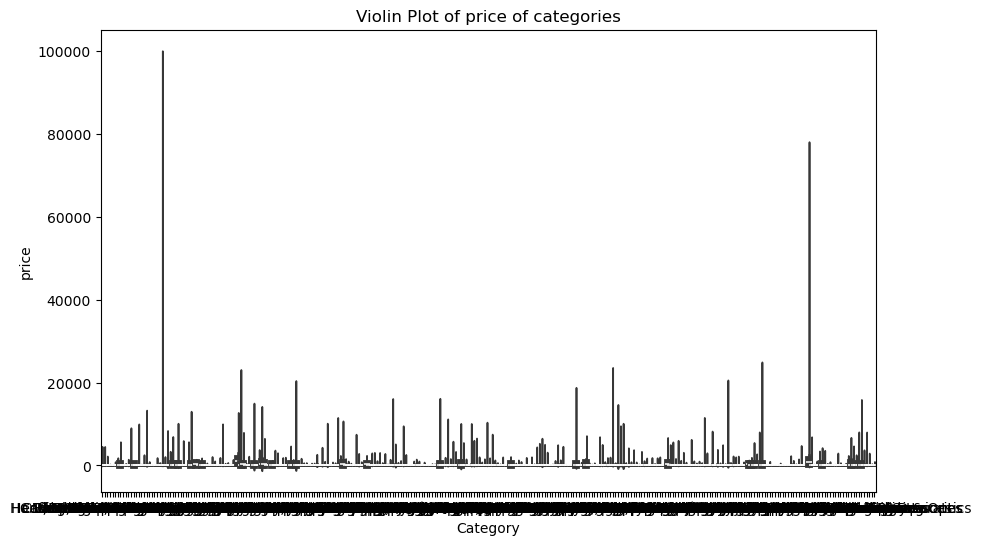

In [99]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='category', y='price', palette="coolwarm")
plt.title('Violin Plot of price of categories')
plt.xlabel('Category')
plt.ylabel('price')
plt.show()

Which product category tends to have the highest median price? Don't filter here by top categories.

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).Which product category commands the highest average price? Don't filter here by top categories.

In [75]:
top_20_frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: count

Analyze how product ratings (stars) correlate with product prices.

Calculate the correlation coefficient between price and stars.Is there a significant correlation between product price and its rating?

In [ ]:
correlation=df['stars'].corr(df['price'])
correlation

-0.12490673262148384

Which signifies, there is no relation between price and stars.

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

<Axes: xlabel='stars', ylabel='price'>

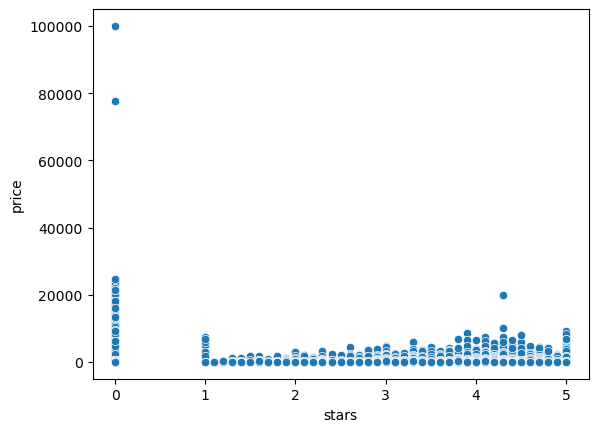

In [ ]:
sns.scatterplot(data=df, x='stars', y='price')
# continuous variable star, price, scatter, 
numerical pearson, ategorical chisquare

Use a correlation heatmap to visualize correlations between all numerical variables.


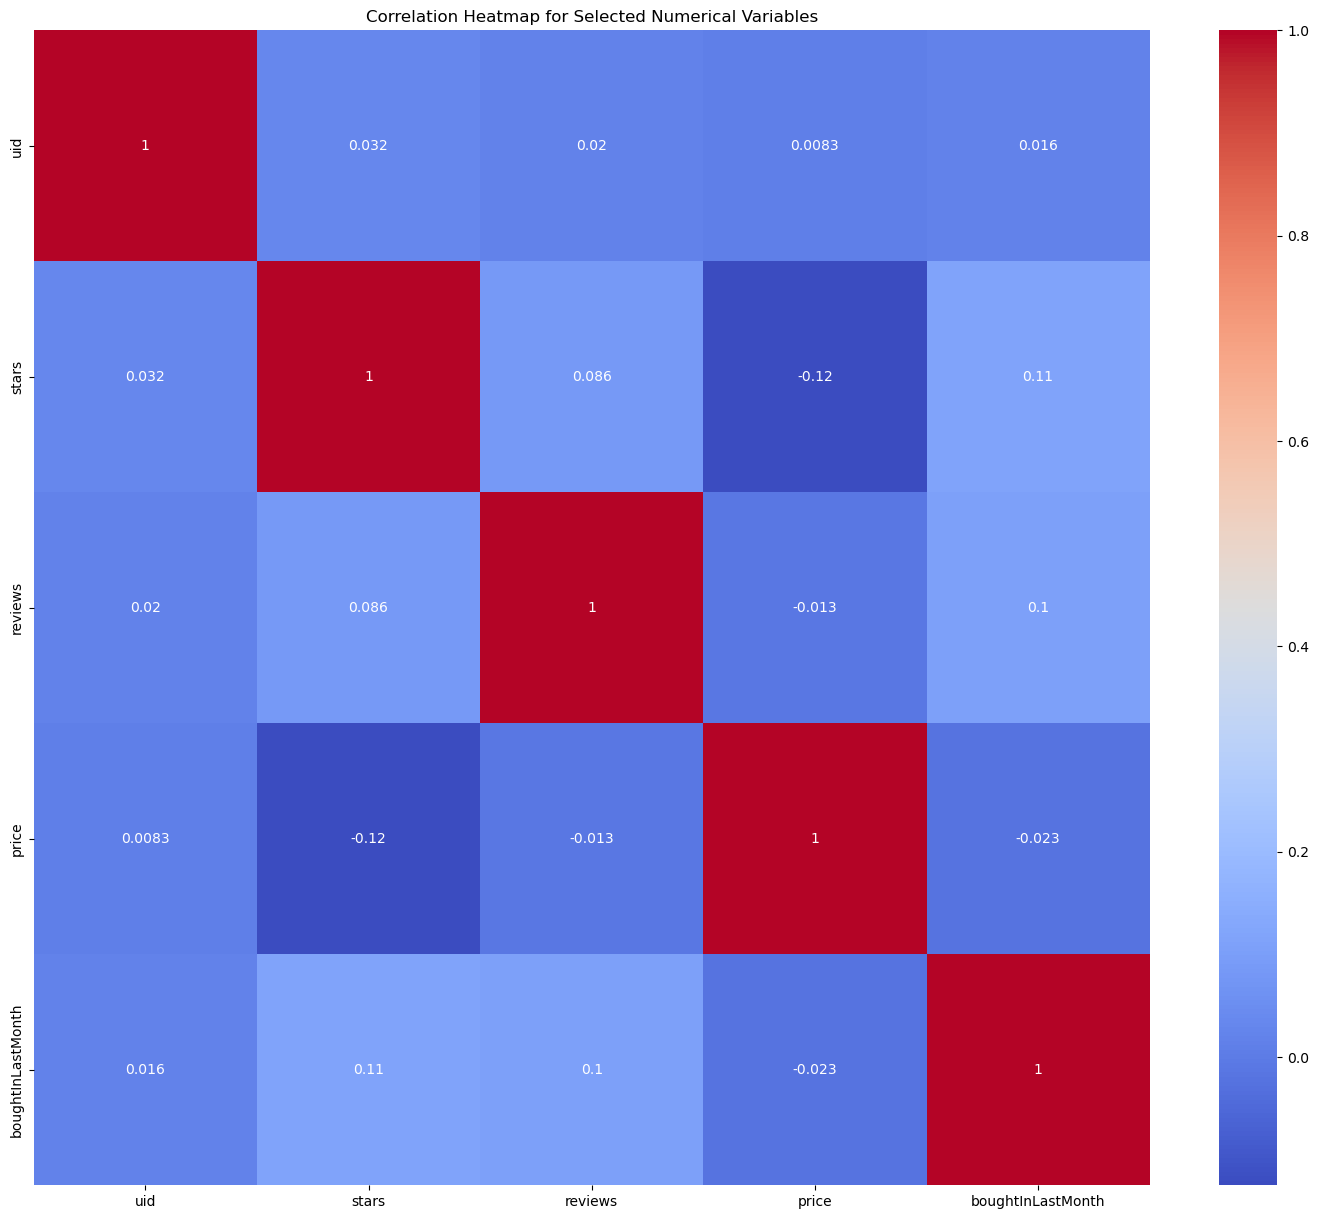

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

Examine if product prices typically follow a normal distribution using a QQ plot.

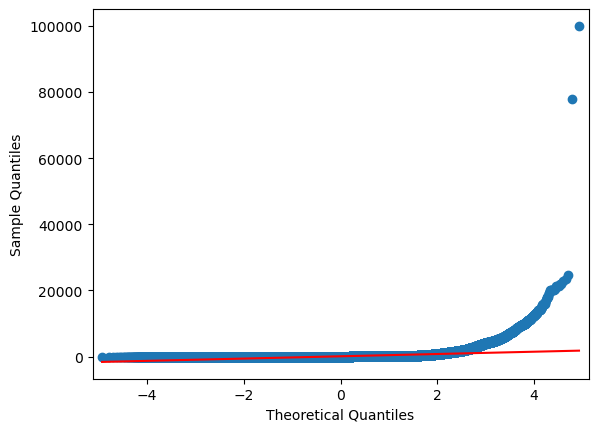

In [ ]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

Findings-
In the upper tail (right side of the plot), the data points deviate significantly from the red line, suggesting a long tail or skewness to the right. This indicates that there are more extreme high values in price than would be expected in a normal distribution.